# Lesson 3 Assignment: 
## Factor Engineering

### Author: Dustin Burnham
### Due: 7/28/2019

A superstore wants to identify customer groupings that visit their stores based on customer transaction (sales) data. These groupings are used for targeted promotions. You are asked to perform customer segmentation on the provided data.

Tasks:
1. Read Dataset
2. Calculate the Recency, Frequency, Monitory for each customer
3. Using K-means algorithm, perform customer segmentation
4. Describe your results

## 1.  Read Dataset

In [1]:
# Import Libraries
import datetime as dt
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from datetime import datetime
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
import plotly.express as px

In [2]:
# Read in data
file = "SuperstoreTransaction.csv"
data = pd.read_csv(file, header=0)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [4]:
len(data['Customer ID'].unique())

793

## 2. Calculate the Recency, Frequency, Monitory for each customer

In [5]:
# Check out data
data["Order Date"] = pd.to_datetime(data["Order Date"], format='%m/%d/%Y')
ts = data["Order Date"]
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
print("Minimal Date=%s, Maximal Date=%s"%(min(data["Order Date"]).strftime("%Y-%m-%d"), \
                                          max(data["Order Date"]).strftime("%Y-%m-%d")))

Minimal Date=2014-01-03, Maximal Date=2017-12-30


In [7]:
def rfm(start, end, window, fm):
    """
    
    """

    Start_Date_Obj = dt.datetime.strptime(start, "%m/%d/%Y")
    End_Date_Obj = dt.datetime.strptime(end, "%m/%d/%Y")
    Time_Window = window
    FM_Window = fm

    check_point_date = Start_Date_Obj
    UserID = []
    Checkpoint = []
    Recency = []
    Frequency = []
    Monetary_Value = []
    Monetary_Quantity = []

    while check_point_date <= End_Date_Obj:
        window_start = check_point_date - dt.timedelta(days = Time_Window)
        mask = (data["Order Date"] >= window_start) & (data["Order Date"] < check_point_date)
        # Get the data in [checkpoint-60days, checkpoint]
        data_checkpoint = data.loc[mask]
        # Get the ids of users who have activities in [checkpoint-60days, checkpoint]
        unique_users = list(set(data_checkpoint["Customer ID"]))
        print("There are %d unique users."%(len(unique_users)))
        FM_Window_Start = check_point_date - dt.timedelta(days = FM_Window)
        for user in unique_users:
            UserID.append(user)
            Checkpoint.append(check_point_date)
            mask = data_checkpoint["Customer ID"] == user
            data_checkpoint_user = data_checkpoint.loc[mask]
            delta = check_point_date - max(data_checkpoint_user["Order Date"])
            recency = delta.days #Recency, days between checkpoint and last transaction time
            mask = data_checkpoint_user["Order Date"] >= FM_Window_Start
            data_checkpoint_user_fm = data_checkpoint_user.loc[mask]
            frequency = data_checkpoint_user_fm.shape[0]
            value = np.sum(data_checkpoint_user_fm.loc[:, "Sales"]) #monetary values
            quantity = np.sum(data_checkpoint_user_fm.loc[:, "Quantity"])#monetary quantity
            Recency.append(recency)
            Frequency.append(frequency)
            Monetary_Value.append(value)
            Monetary_Quantity.append(quantity)
        check_point_date = check_point_date + dt.timedelta(days = 7)
    # Consolidate all columns into a signle data frame
    RFM_Dict = OrderedDict([ ('UserID', UserID),
              ('Checkpoint', Checkpoint),
              ('Recency',  Recency),
              ('Frequency', Frequency),
              ('Value', Monetary_Value),
              ('Quantity', Monetary_Quantity)] )
    RFM_Frame = pd.DataFrame.from_dict(RFM_Dict)
    RFM_Frame.head()
    return(RFM_Frame)

In [8]:
# Calculate rfm over two year period
total_rfm = rfm("01/01/2015", "01/01/2017", 60, 7)

There are 242 unique users.
There are 231 unique users.
There are 214 unique users.
There are 185 unique users.
There are 155 unique users.
There are 137 unique users.
There are 127 unique users.
There are 102 unique users.
There are 79 unique users.
There are 67 unique users.
There are 75 unique users.
There are 81 unique users.
There are 101 unique users.
There are 111 unique users.
There are 114 unique users.
There are 124 unique users.
There are 132 unique users.
There are 137 unique users.
There are 138 unique users.
There are 140 unique users.
There are 128 unique users.
There are 124 unique users.
There are 131 unique users.
There are 124 unique users.
There are 124 unique users.
There are 133 unique users.
There are 129 unique users.
There are 130 unique users.
There are 132 unique users.
There are 133 unique users.
There are 130 unique users.
There are 125 unique users.
There are 128 unique users.
There are 122 unique users.
There are 121 unique users.
There are 116 unique use

In [9]:
# Calculate rfm over last month
recent_rfm = rfm("12/01/2017", "12/30/2017", 60, 7)

There are 316 unique users.
There are 332 unique users.
There are 343 unique users.
There are 340 unique users.
There are 358 unique users.


In [10]:
total_rfm.head()

,UserID,Checkpoint,Recency,Frequency,Value,Quantity
0,SP-20620,2015-01-01,2,5,609.614,13
1,MG-17695,2015-01-01,6,4,361.608,11
2,MS-17365,2015-01-01,55,0,0.000,0
3,JD-16150,2015-01-01,46,0,0.000,0
4,DE-13255,2015-01-01,57,0,0.000,0


In [11]:
recent_rfm.head()

,UserID,Checkpoint,Recency,Frequency,Value,Quantity
0,HG-14845,2017-12-01,25,0,0.0,0
1,BO-11425,2017-12-01,46,0,0.0,0
2,SP-20620,2017-12-01,18,0,0.0,0
3,JW-15955,2017-12-01,48,0,0.0,0
4,KL-16645,2017-12-01,18,0,0.0,0


## 3. Using K-means algorithm, perform customer segmentation

#### Customer segmentation for customers over the two years.  I will aggregate the customers, and then use K-means to segment the customers.

In [12]:
# Create variable for last purchase date
total_rfm['last_purchase_date'] = total_rfm['Checkpoint'] - pd.to_timedelta(total_rfm["Recency"], unit='D')

In [13]:
total_rfm.head()

,UserID,Checkpoint,Recency,Frequency,Value,Quantity,last_purchase_date
0,SP-20620,2015-01-01,2,5,609.614,13,2014-12-30
1,MG-17695,2015-01-01,6,4,361.608,11,2014-12-26
2,MS-17365,2015-01-01,55,0,0.000,0,2014-11-07
3,JD-16150,2015-01-01,46,0,0.000,0,2014-11-16
4,DE-13255,2015-01-01,57,0,0.000,0,2014-11-05


In [14]:
# Aggregate
max_check_df = total_rfm.groupby('UserID').agg({'Checkpoint' : ['max'],
                                                 'last_purchase_date' : ['max'],
                                                 'Frequency' : ['sum'], 
                                                 'Value' : ['sum'], 
                                                 'Quantity' : ['sum']})

# Turn last purchase date into integer days since purchase
max_check = np.datetime64('2017-01-01')
max_check_df['last_purchase_date'] = max_check - np.array(max_check_df['last_purchase_date']).flatten().astype('datetime64[D]')

In [15]:
max_check_df['last_purchase_date'] = max_check_df['last_purchase_date'].astype(int) / (1000000000 * 3600 * 24)

In [16]:
max_check_df.head()

,Checkpoint,last_purchase_date,Frequency,Value,Quantity
,max,max,sum,sum,sum
UserID,,,,,
AA-10315,2016-04-28,304,5,4433.032,16
AA-10375,2016-12-29,48,8,798.866,20
AA-10480,2016-10-20,128,10,1747.500,31
AA-10645,2016-11-03,119,11,3639.645,44
AB-10015,2016-12-29,52,2,563.940,4


In [17]:
# Select Wanted columns
max_check_df = max_check_df.iloc[:,1:]

#### Normalize Date

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(max_check_df)
max_check_norm = pd.DataFrame(np_scaled)

/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



#### K-Means

In [19]:
# Try 2, 3, 4, 5 clusters
k = 3

# Get matrix of values
matrix_rfm = max_check_norm.values

# Create model
model = KMeans(n_clusters = k)

# Cluster
model.fit(matrix_rfm)

# Get labels, add to dataframe 
labels = model.labels_
k_means_results = pd.DataFrame([max_check_df.index,labels]).T

In [20]:
k_means_results.head()

,0,1
0,AA-10315,0
1,AA-10375,1
2,AA-10480,2
3,AA-10645,2
4,AB-10015,1


In [21]:
# Add labels to original data
max_check_df['k_means_label'] = np.array(k_means_results.iloc[:,1])

/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.



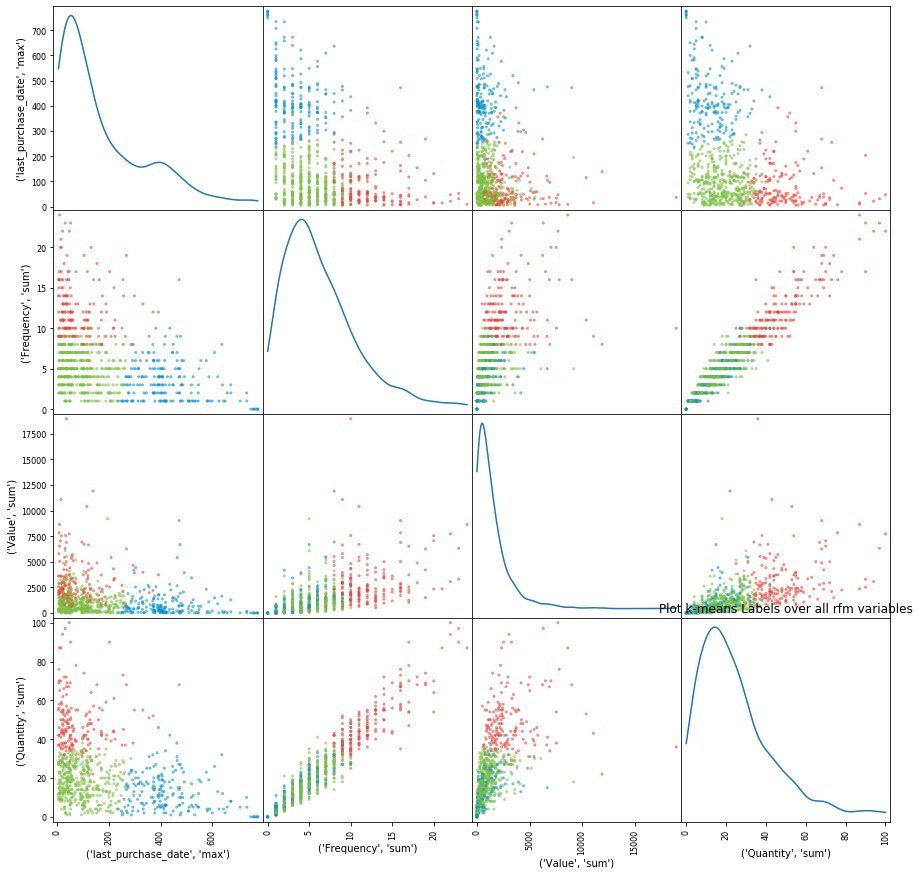

In [22]:
# Plot rfm data with labels
# Foundation code found on stack exchange
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = max_check_df["k_means_label"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(max_check_df.iloc[:,:-1], color=colors, alpha=0.6, figsize=(15, 15), diagonal='kde')
plt.title("Plot k-means Labels over all rfm variables")
plt.show()

### Now repeat for data over the last month

In [23]:
# Aggregate rfm data
recent_df = recent_rfm.groupby('UserID').agg({'Checkpoint' : ['max'],
                                                 'Frequency' : ['sum'], 
                                                 'Value' : ['sum'], 
                                                 'Quantity' : ['sum']})

In [24]:
# Select Wanted columns
recent_df = recent_df.iloc[:,1:]

#### Normalize

In [25]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(recent_df)
recent_norm = pd.DataFrame(np_scaled)

/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



#### K-Means

In [26]:
# Try 2, 3, 4, 5 clusters
k = 3

# Get matrix of data
matrix_rfm = recent_norm.values

# Create model object
model = KMeans(n_clusters = k)

# Train model
model.fit(matrix_rfm)

# Get labels, add to dataframe
labels = model.labels_
k_means_results = pd.DataFrame([recent_df.index,labels]).T

In [27]:
# Add labels column to rfm data
recent_df['k_means_label'] = np.array(k_means_results.iloc[:,1]).astype(int)

In [28]:
recent_df.head()

,Frequency,Value,Quantity,k_means_label
,sum,sum,sum,
UserID,,,,
AA-10375,3,149.872,6,1
AA-10645,0,0.000,0,0
AB-10060,0,0.000,0,0
AB-10105,0,0.000,0,0
AB-10150,0,0.000,0,0


/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.



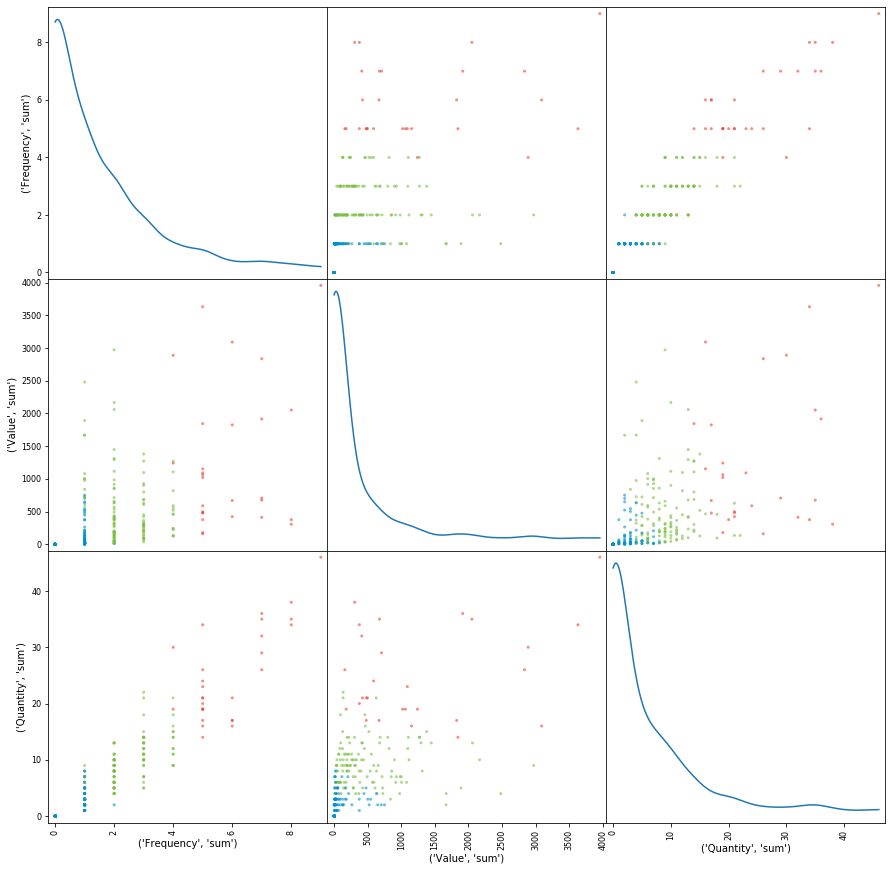

In [29]:
# Plot rfm data with labels as color
# Foundation code found on stack exchange
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = recent_df["k_means_label"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(recent_df.iloc[:,:-1], c=colors, alpha=0.6, figsize=(15, 15), diagonal='kde')

## 4. Describe the Results:

#### Summary:
To begin, I read in my data.  I was interested in investigating two groups of the data, both a long term look (2 year period) and short term (1 month period) for customer segmentation.  I calculated the RFM for both a one month period and the two year period, and then aggregated the results.  For the two year period, I summed the frequency, value, and quantity per customer, and then found how many days since their last purchase as the recency.  For the one month period I just aggregated over the frequency, value, and quantity.  I decided not to look at frequency, since it is already a short period.  Next for clustering, I normalized both data sets using the min max method.  Because I was unsure of how many clusters to select for customer segmentation, I tried 2, 3, 4, and 5.  I though 3 gave a good middle ground, so I selected that for the k-means clustering of both groups of data.  I then assigned the cluster labels to the non-normalized data frames for analysis. 

#### Results:
##### Two Year Data:
The k-means clustering over the two year period gave the more interesting results.  When using a matrix scatter plot, with the labels displayed by color, we can see some clear separation between multiple variables.  Relationships seen:
1. Frequency, Last purchase date
2. Value, last purchase date
3. Quantity, last purchase date

From this we can segment the customers by last purchase date and hopefully get some predictive value going forward when it comes to frequency, value, and quantity as there are relationships within this set of data.

##### One Month Data:
The one month data was less helpful because there were just fewer customers to aggregate over.  Because of this I think we should use rfm over larger time periods to use for clustering.  However, when looking at the data with cluster labels, there are some definite associations between say quantity and value, which I think is unsurprising. 

#### Next Steps:
I think getting more data from the store would be helpful to find out how to better interpret these found clusters.  Once the store can identify what makes these customer trends, they can better prepare a business model to optimize profit.  